# Implementation

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
plt.style.use('dark_background')

In [3]:
import sklearn
import keras

In [4]:
from keras.applications import InceptionV3

In [5]:
!pip install opencv-python==4.5.5.64

In [6]:
import cv2

## Exploratory Analysis

In [7]:
path = os.getcwd()
path = path[:-4]
data_dir = path + "/data/lfw-deepfunneled"

In [8]:
len(os.listdir(data_dir))

5750

Should be 5750 people.

In [9]:
people = pd.read_csv(path + "/data/people.csv")

In [10]:
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


5758 people in metadata spreadsheet... let's consider only the intersection.

In [11]:
names = [item for item in people["name"].tolist() if item in os.listdir(data_dir)]

In [12]:
len(names)

5749

In [13]:
people = people[people["name"].isin(names)]

In [14]:
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


In [15]:
people["images"].sum()

13233.0

Let's get the pixel matrix of an image and plot it.

In [16]:
image_path = data_dir + '/' + names[0] + '/' + names[0] + '_0001.jpg'

In [17]:
image = cv2.imread(image_path)

In [18]:
image.shape

(250, 250, 3)

250 x 250 pixel image with 3 color channels

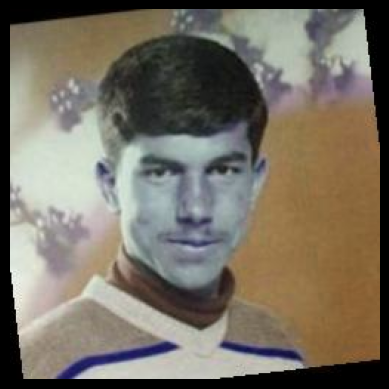

In [19]:
plt.imshow(image)
plt.axis('off')
plt.show()

## Model Architecture

In [20]:
model = InceptionV3()

In [21]:
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

## Model Training on LFW Dataset